In [1]:
# import import_ipynb

In [12]:
from func import *
import json
from tqdm import tqdm

In [13]:
with open("rounda488.json", encoding='utf-8') as f:
    dic = json.load(f)

In [14]:
dic_stock = {}
for d in dic:
    dic_stock[d] = {}
    dic_stock[d]['x'] = np.array(list(dic[d].keys()),dtype='float64')
    dic_stock[d]['y'] = np.array(list(dic[d].values()),dtype='float64')
    dic_stock[d]['data'] = pd.DataFrame(dic_stock[d]['y'],dic_stock[d]['x'])

In [15]:
list(dic_stock.keys())[25]

'stock102590'

In [16]:
len(dic_stock)

111

In [39]:
def fit_model(dic,name,x,y,data,adfmethod='hp',modelmethod='bic',maxlag=5,fstep=3,flag='data'):
    
    if not adfTest(y):
        if(adfmethod == 'hp'):
            cycle,trend = hpFilter(y)
            dic[name]['hp'] = {'cycle':cycle,'trend':trend}
            fit_model(dic,name,x,cycle,pd.DataFrame(cycle,x),adfmethod='diff',maxlag=5,fstep=fstep,flag='cycle')
            fit_model(dic,name,x,trend,pd.DataFrame(trend,x),adfmethod='diff',maxlag=5,fstep=fstep,flag='trend')
        elif(adfmethod == 'diff'):
            dy,dyf = bestDiff(pd.DataFrame(y))
            y = dy.values
            dic[name]['diff'][flag] = {'dy':y, 'dy_firstvalue':dyf}
        else:
            print('error adf!')
    
    best_score,best_cfg = chooseModels2(y,maxlag,method=modelmethod)
    dic[name]['pq'][flag] = {'best_cfg':best_cfg,'best_score':best_score}
    model, model_result = fitModel(y,best_cfg)
    dic[name]['model'][flag] = {'model':model, 'model_result':model_result}
    dic[name]['modelfit'][flag] = modelBLQ(model_result,int(len(y)*0.33))
    py = forcastInModel(model_result)
    pyo,pyci = forcastOutModel(model_result,fstep)
    pyciu = pyci[:,0][-fstep:]
    pycid = pyci[:,1][-fstep:]
    
    if 'dy' in vars():
        df = pd.DataFrame(py,index=list(range(len(dyf)+1,len(py)+len(dyf)+1)))
        dfp = pd.DataFrame(np.append(py,pyo),index=list(range(len(dyf)+1,len(py)+len(dyf)+1+fstep)))
        dfu = pd.DataFrame(np.append(py,pyci[:,0]),index=list(range(len(dyf)+1,len(py)+len(dyf)+1+fstep)))
        dfd = pd.DataFrame(np.append(py,pyci[:,1]),index=list(range(len(dyf)+1,len(py)+len(dyf)+1+fstep)))
        py = recoverDiff(df, dyf)
        pyo = recoverDiff(dfp, dyf)
        pyciu = recoverDiff(dfu, dyf)
        pycid = recoverDiff(dfd, dyf)
        py,pyo,pyciu,pycid = py[0].values,pyo[0].values,pyciu[0].values,pycid[0].values
        pyo,pyciu,pycid = pyo[-fstep:],pyciu[-fstep:],pycid[-fstep:]
    
    dic[name]['predict'][flag] = {'py':py,'pyo':pyo,'pyciu':pyciu,'pycid':pycid}
    
    return dic
    


In [40]:
fstep = 3
dic = {}
name = 'stock102590'
x = dic_stock[name]['x'][:-fstep]
y = dic_stock[name]['y'][:-fstep]
data = dic_stock[name]['data']
dic[name] = {}
dic[name]['data'] = list(y)
dic[name]['hp'] = None
dic[name]['diff'] = {}
dic[name]['pq'] = {}
dic[name]['model'] = {}
dic[name]['modelfit'] = {}
dic[name]['predict'] = {}
dic[name]['real'] = dic_stock[name]['y'][-fstep:]
dic[name]['Volatility'] = None
dic[name]['return'] = None
dic[name]['predict_return'] = None
dic = fit_model(dic,name,x,y,data,adfmethod='hp',modelmethod='bic',maxlag=5,fstep=fstep,flag='data')

(0, 0) 247.1572002670248
(0, 1) -42.99573818359549
(0, 2) error
(0, 3) error
(0, 4) error
(1, 0) -145.7241333103387
(1, 1) -154.86199563733246
(1, 2) -149.2465341831377
(1, 3) -143.40930324431574
(1, 4) -144.00222430338775
(2, 0) -152.6061500334756
(2, 1) -149.27020648419867
(2, 2) error
(2, 3) error
(2, 4) error
(3, 0) -148.17887414448424
(3, 1) -143.16896148609553
(3, 2) -192.52629901949743
(3, 3) error
(3, 4) error
(4, 0) -147.4818045403584
(4, 1) -209.1248988702894
(4, 2) error
(4, 3) error
(4, 4) error
(0, 0) -3959.0155721136703
(0, 1) -4611.25865543512
(0, 2) error
(0, 3) error
(0, 4) error
(1, 0) -5642.162448269052
(1, 1) error
(1, 2) error
(1, 3) error
(1, 4) error
(2, 0) error
(2, 1) -7314.47036128755
(2, 2) -7347.26928267598
(2, 3) -7346.82575341153
(2, 4) -7352.990421701123
(3, 0) error
(3, 1) -7362.613467291957
(3, 2) -7360.1818259596175
(3, 3) -7354.29072140115
(3, 4) -7350.0810162566195
(4, 0) error
(4, 1) -7358.124354891676
(4, 2) -7354.141467025058
(4, 3) error
(4, 4) e

In [21]:
fstep = 3
dic = {}
for d in tqdm(dic_stock):
    name = d
    x = dic_stock[name]['x'][:-fstep]
    y = dic_stock[name]['y'][:-fstep]
    data = dic_stock[name]['data']
    dic[name] = {}
    dic[name]['data'] = list(y)
    dic[name]['hp'] = None
    dic[name]['diff'] = {}
    dic[name]['pq'] = {}
    dic[name]['model'] = {}
    dic[name]['modelfit'] = {}
    dic[name]['predict'] = {}
    dic[name]['real'] = dic_stock[name]['y'][-fstep:]
    dic[name]['Volatility'] = None
    dic[name]['return'] = None
    dic[name]['predict_return'] = None
    dic = fit_model(dic,name,x,y,data,adfmethod='hp',modelmethod='bic',maxlag=5,fstep=fstep,flag='data')

  0%|                                                                                          | 0/111 [00:00<?, ?it/s]

(0, 0) 1383.5080671012795
(0, 1) 1072.0726957373788
(0, 2) error
(0, 3) 915.7694756123404
(0, 4) error
(1, 0) 863.9288083206344
(1, 1) 861.985931362707
(1, 2) 867.3144735143513
(1, 3) 873.4730249147968
(1, 4) 866.8250579562587
(2, 0) 861.1297111158464
(2, 1) 810.4186985796513
(2, 2) 816.5979310790582
(2, 3) 819.1984951597477
(2, 4) error
(3, 0) 866.6008723972111
(3, 1) 816.5989425718004
(3, 2) 821.4572757532367
(3, 3) error
(3, 4) error
(4, 0) 870.8574610968179
(4, 1) error
(4, 2) error
(4, 3) error
(4, 4) error



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3291, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-21-945b82a44ba9>", line 19, in <module>
    dic = fit_model(dic,name,x,y,data,adfmethod='hp',modelmethod='bic',maxlag=5,fstep=fstep,flag='data')
  File "<ipython-input-19-9f6e0e3ba4ab>", line 7, in fit_model
    fit_model(dic,name,x,cycle,pd.DataFrame(cycle,x),adfmethod='diff',maxlag=5,fstep=fstep,flag='cycle')
  File "<ipython-input-19-9f6e0e3ba4ab>", line 18, in fit_model
    model, model_result = fitModel(y,best_cfg)
  File "C:\Users\BIN\Desktop\毕业设计\program\func.py", line 204, in fitModel
    model_result = model.fit(disp=0)
  File "D:\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py", line 959, in fit
    callback=callback, **kwargs)
  File "D:\Anaconda3\lib\site-packages\statsmodels\base\model.py", line 466, in fit
    full_output=full_output)
  File "D:\Anaconda3\

KeyboardInterrupt: 

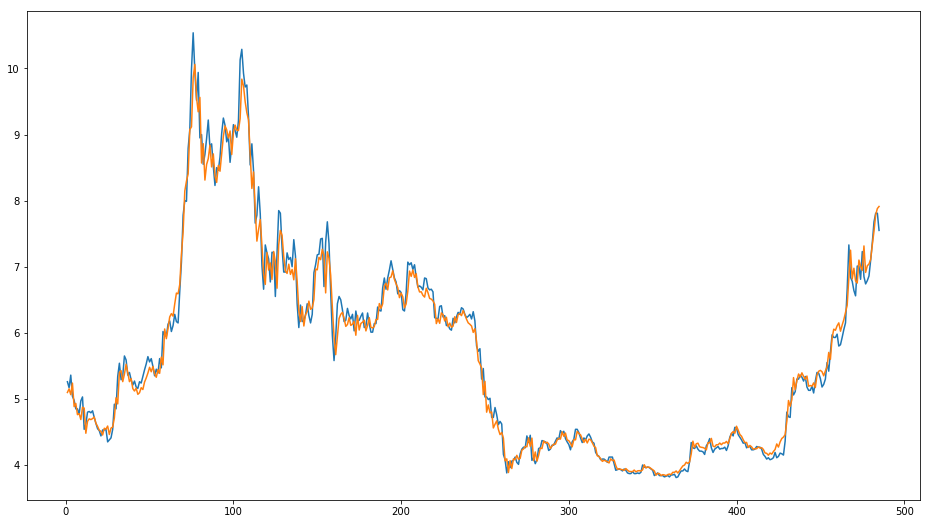

In [43]:
plt.figure(figsize=(16,9))
sns.lineplot(x,y)
sns.lineplot(x,dic[name]['predict']['trend']['py']+dic[name]['predict']['cycle']['py'])

In [44]:
dic[name]['pq']

{'cycle': {'best_cfg': (4, 1), 'best_score': -209.1248988702894},
 'trend': {'best_cfg': (3, 1), 'best_score': -7362.613467291957},
 'data': {'best_cfg': (1, 0), 'best_score': -42.64552791218311}}

In [45]:
len(dic[name]['predict']['trend']['pyo'])

3

In [46]:
dic

{'stock102590': {'data': [5.26,
   5.17,
   5.36,
   5.04,
   4.98,
   4.85,
   4.85,
   4.77,
   4.97,
   5.03,
   4.54,
   4.62,
   4.8,
   4.81,
   4.79,
   4.82,
   4.72,
   4.63,
   4.55,
   4.52,
   4.44,
   4.53,
   4.53,
   4.54,
   4.35,
   4.38,
   4.41,
   4.54,
   4.92,
   4.85,
   5.34,
   5.54,
   5.29,
   5.35,
   5.65,
   5.59,
   5.36,
   5.4,
   5.29,
   5.21,
   5.27,
   5.18,
   5.16,
   5.26,
   5.24,
   5.34,
   5.44,
   5.53,
   5.64,
   5.56,
   5.61,
   5.49,
   5.35,
   5.45,
   5.39,
   5.61,
   5.47,
   6.02,
   5.96,
   5.95,
   6.13,
   6.18,
   6.02,
   6.11,
   6.28,
   6.17,
   6.15,
   6.63,
   7.07,
   7.78,
   8.0,
   7.99,
   8.79,
   9.08,
   9.99,
   10.54,
   9.96,
   9.52,
   9.94,
   8.95,
   9.0,
   8.55,
   8.7,
   8.94,
   9.22,
   8.8,
   8.86,
   8.52,
   8.23,
   8.5,
   8.46,
   8.66,
   9.02,
   9.25,
   9.14,
   8.89,
   8.98,
   8.58,
   8.85,
   9.15,
   9.06,
   8.96,
   9.21,
   10.13,
   10.29,
   9.93,
   9.72,
   9.75,
   9.27,


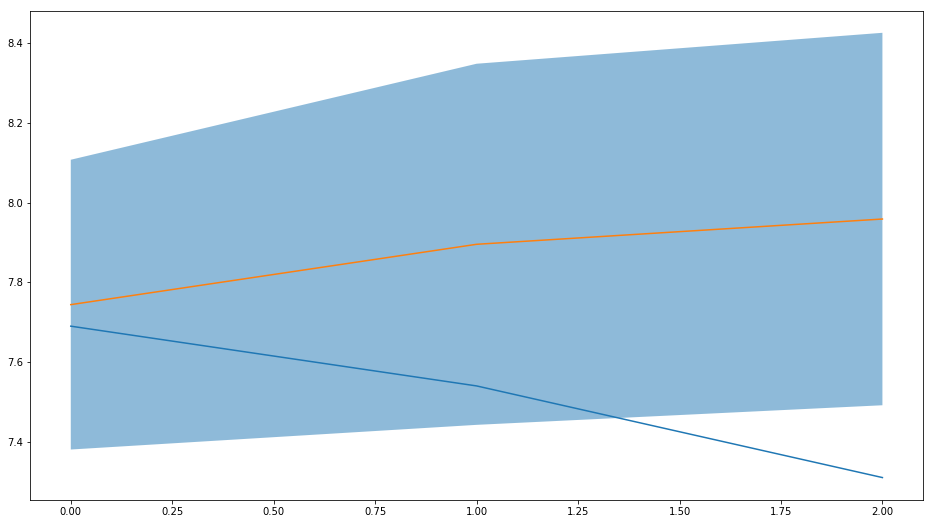

In [27]:
plt.figure(figsize=(16,9))
sns.lineplot([i for i in range(fstep)],dic[name]['real'])
sns.lineplot([i for i in range(fstep)],dic[name]['predict']['trend']['pyo']+dic[name]['predict']['cycle']['pyo'])
plt.fill_between([i for i in range(fstep)],dic[name]['predict']['trend']['pyciu']+dic[name]['predict']['cycle']['pyciu'],dic[name]['predict']['trend']['pycid']+dic[name]['predict']['cycle']['pycid'],alpha=0.5)

In [28]:
evaluationValue(dic[name]['real'],dic[name]['predict']['trend']['pyo']+dic[name]['predict']['cycle']['pyo'])

,index,MSE,RMSE,MAE,R2
0,1.0,0.183456,0.428317,0.35281,-6.51184


In [ ]:
with open('test.json','w') as f:
    f.write(json.dumps(dic,ensure_ascii=False,indent=2))
    f.close()